<a href="https://colab.research.google.com/github/feliipedaza22/IA_Proyecto_Forest_ANJ23/blob/main/Algoritmos_clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los datos usados son de la página Kaggle y se pueden encontrar en el siguiente enlace: https://www.kaggle.com/competitions/forest-cover-type-prediction

Para obtener los datos y hacerlos disponibles en los notebooks cuando se ejecutan en Colab se deben realizar los siguientes pasos:



* Creación de API Token: para descargar los archivos desde el cuaderno de Jupyter se debe crear un token desde tu cuenta de Kaggle. Este procedimiento se realiza yendo a la configuración de tu perfil y luego das click en "Create New API Token" y se descargará un archivo kaggle.json donde se encuentra tu nombre de usuario y el token, ambos los necesitarás para descargar los archivos.

* Aceptación de las reglas de la competencia: también es obligatorio aceptar las reglas de la competencia. Estas reglas se encuentran en https://www.kaggle.com/competitions/forest-cover-type-prediction/rules. Si este proceso no se realiza, la descarga se prohíbe y no es posible acceder a los archivos desde acá, deberán ser descargados entonces.  

Una vez se hayan realizado estos dos pasos, con este bloque de código se pueden descargar los archivos.

In [1]:
!pip install opendatasets
import opendatasets as od
dataset_link="https://www.kaggle.com/competitions/forest-cover-type-prediction/data?select=sampleSubmission.csv"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andresfelipe22
Your Kaggle Key: ··········


100%|██████████| 25.3M/25.3M [00:00<00:00, 116MB/s] 



Extracting archive ./forest-cover-type-prediction/forest-cover-type-prediction.zip to ./forest-cover-type-prediction


Después, debe abrir el directorio donde se encuentran los archivos descargados para poder trabajar con ellos.

In [2]:
import os
os.chdir("forest-cover-type-prediction")
os.listdir()

['test.csv.zip',
 'test3.csv',
 'sampleSubmission.csv',
 'train.csv.zip',
 'train.csv',
 'sampleSubmission.csv.zip',
 'test.csv']




Se importa la biblioteca pandas para leer los archivos de entrenamiento y de prueba.

In [3]:
import pandas as pd
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

Podemos ver los primeros elementos del archivo de entrenamiento,train


In [4]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Vemos los primeros elementos del archivo de pruebas, test

In [5]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


Importamos las librerías necesarias para realizar el algoritmo de clasificación

In [6]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Se crean diferentes modelos utilizando las librerías que ya están instaladas para evaluar su exactitud, precisión, uso de memoria y puntuación.

In [7]:
def classification_(X,y):
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    X=X
    y=y
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
    algos=[g,b,k,svc,d,log,gbc,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','RandomForest','AdaBoost']
    accuracy = []
    precision = []
    recall = []
    f1 = []
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    for i in algos:
        predict=i.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    return result.sort_values('f1_Score',ascending=False)

Para garantizar resultados precisos, cada algoritmo de clasificación se ejecutará utilizando una copia nueva de los datos de entrenamiento.

In [8]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']

Se imprime un dataframe con los 9 tipos de clasificadores y sus caracteríasticas.

In [9]:
classification_(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,AccuracyScore,PrecisionScore,RecallScore,f1_Score
RandomForest,0.868717,0.868717,0.868717,0.868717
KNeigbors,0.804894,0.804894,0.804894,0.804894
GradientBoosting,0.802910,0.802910,0.802910,0.802910
DecisionTree,0.788029,0.788029,0.788029,0.788029
SVC,0.625661,0.625661,0.625661,0.625661
Bernoulli,0.610780,0.610780,0.610780,0.610780
Gaussian,0.600860,0.600860,0.600860,0.600860
LogisticRegr,0.474537,0.474537,0.474537,0.474537
AdaBoost,0.346561,0.346561,0.346561,0.346561


Para comprender mejor el comportamiento de los clasificadores y el porqué del orden de la tabla anterior, generamos una serie de gráficas para los clasificadores más representativos. En particular, graficamos el primer y último clasificador de la tabla, así como algunos intermedios.



Importar, matplotlib y numpy

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

RandomForest es el algoritmo que obtuvo el puntaje más alto en la evaluación. Vamos a analizar su comportamiento para comprender mejor su rendimiento.

In [12]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Se crea una instancia del clasificador Random Forest, luego se entrena el modelo, se obtienen datos con caracterísitcas, importancia, nombres y se ordenan dependiendo de la  importancia que tenga en el modelo.
Se grafican las 10 características más importantes.

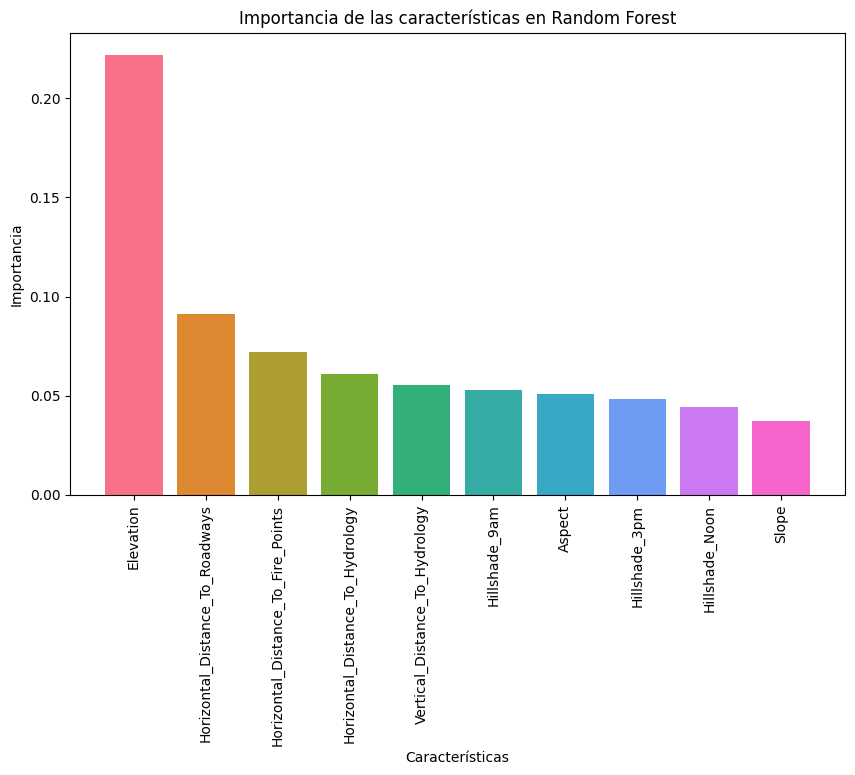

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_[:10]
feature_names = X_train.columns[:10]
indices = np.argsort(importances)[::-1][:10]

import seaborn as sns
earth_tones = sns.color_palette("husl", 10)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(importances)), importances[indices], color=earth_tones)
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en Random Forest')
plt.show()


Para evaluar el desempeño del clasificador, generamos una matriz de confusión. Esta matriz nos muestra las predicciones correctas e incorrectas del clasificador para cada tipo de corteza.

Para generar la matriz de confusión, primero realizamos predicciones en el conjunto de prueba. Luego, calculamos la matriz de confusión a partir de las predicciones y los resultados reales. Finalmente, graficamos la matriz de confusión para facilitar su interpretación.

from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión de Random Forest')
plt.show()
print("\nTipos:")
Tipos=["0. Spruce/Fir","1. Lodgepole Pine","2. Ponderosa Pine", "3. Cottonwood/Willow", "4. Aspen", "5. Douglas-fir","6. Krummholz"]
for tipo in Tipos:
  print(tipo)

El siguiente modelo que evaluamos es el algoritmo KNeighbors. Para este modelo, elegimos k = 5, lo que significa que el clasificador considera los tres vecinos más cercanos de un nuevo punto de datos para predecir su clase.

In [14]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

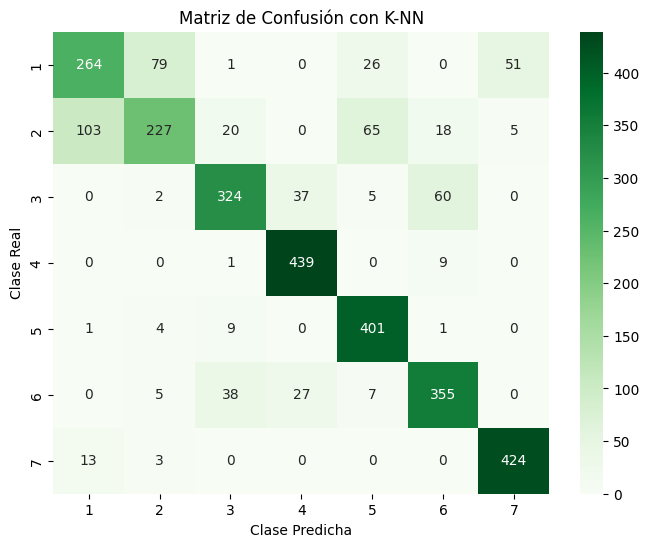


Tipos:
0. Spruce/Fir
1. Lodgepole Pine
2. Ponderosa Pine
3. Cottonwood/Willow
4. Aspen
5. Douglas-fir
6. Krummholz

Matriz de confusión: 
[[264  79   1   0  26   0  51]
 [103 227  20   0  65  18   5]
 [  0   2 324  37   5  60   0]
 [  0   0   1 439   0   9   0]
 [  1   4   9   0 401   1   0]
 [  0   5  38  27   7 355   0]
 [ 13   3   0   0   0   0 424]]


In [15]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(x_test)
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión con K-NN')
plt.show()
print("\nTipos:")
Tipos=["0. Spruce/Fir","1. Lodgepole Pine","2. Ponderosa Pine", "3. Cottonwood/Willow", "4. Aspen", "5. Douglas-fir","6. Krummholz"]
for tipo in Tipos:
  print(tipo)
print("\nMatriz de confusión: ")
print(cm)

Gráfica la curva de aprendizaje

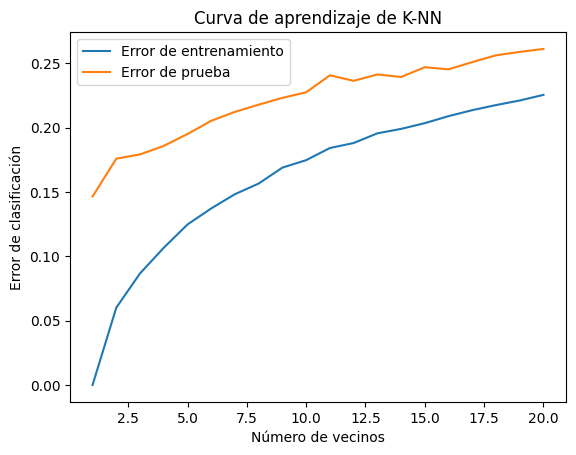

In [16]:
neighbors = np.arange(1, 21)
train_errors = []
test_errors = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(x_test, y_test))
plt.plot(neighbors, train_errors, label='Error de entrenamiento')
plt.plot(neighbors, test_errors, label='Error de prueba')
plt.xlabel('Número de vecinos')
plt.ylabel('Error de clasificación')
plt.title('Curva de aprendizaje de K-NN')
plt.legend()
plt.show()

El siguiente clasificador que evaluamos es el algoritmo Bernoulli. Este clasificador asume que cada característica es un evento binario, por lo que solo puede tomar dos valores, por ejemplo, 0 o 1.

Para evaluar el desempeño del modelo, generamos una matriz de probabilidades. Esta matriz muestra la probabilidad de que un punto de datos pertenezca a cada clase, dada la distribución de probabilidad del clasificador.

Para crear la matriz de probabilidades, primero creamos una instancia del clasificador. Luego, ajustamos el clasificador a los datos de entrenamiento. Finalmente, obtenemos la matriz de probabilidades estimadas del clasificador.

In [17]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

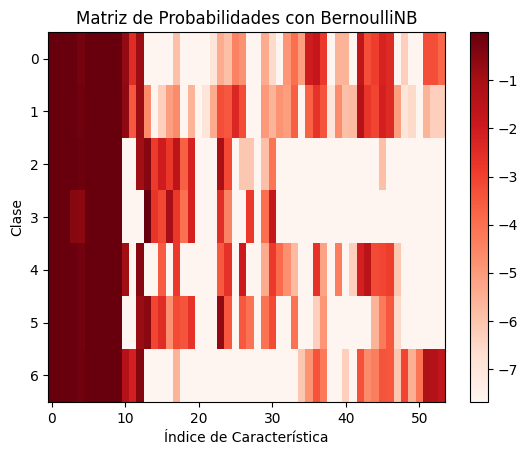

In [18]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)
probability_matrix = bernoulli_nb.feature_log_prob_
plt.imshow(probability_matrix, cmap='Reds', aspect='auto')
plt.colorbar()
plt.xlabel('Índice de Característica')
plt.ylabel('Clase')
plt.title('Matriz de Probabilidades con BernoulliNB')
plt.show()

Ahora probaos
 a **Logistic Regression**.

In [19]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Para analizar las predicciones, generamos una matriz de confusión. La matriz graficada muestra los valores de la matriz con exponentes. Para facilitar la interpretación, mostramos la matriz con los valores numéricos.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


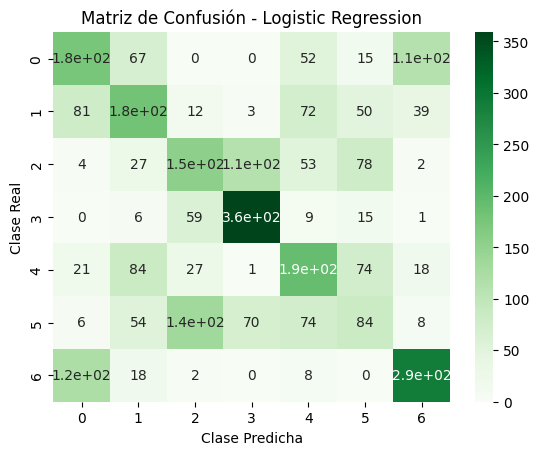


Tipos:
0. Spruce/Fir
1. Lodgepole Pine
2. Ponderosa Pine
3. Cottonwood/Willow
4. Aspen
5. Douglas-fir
6. Krummholz

Matriz de confusión: 
[[176  67   0   0  52  15 111]
 [ 81 181  12   3  72  50  39]
 [  4  27 153 111  53  78   2]
 [  0   6  59 359   9  15   1]
 [ 21  84  27   1 191  74  18]
 [  6  54 136  70  74  84   8]
 [121  18   2   0   8   0 291]]


In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_mat, annot=True, cmap="Greens")
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Logistic Regression')
plt.show()
print("\nTipos:")
Tipos=["0. Spruce/Fir","1. Lodgepole Pine","2. Ponderosa Pine", "3. Cottonwood/Willow", "4. Aspen", "5. Douglas-fir","6. Krummholz"]
for tipo in Tipos:
  print(tipo)
print("\nMatriz de confusión: ")
print(confusion_mat)

Por último veremis el clasificador **Adaboost**, este es el de menor puntaje.

In [21]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

 Gráfica de las 10 características más importantes.

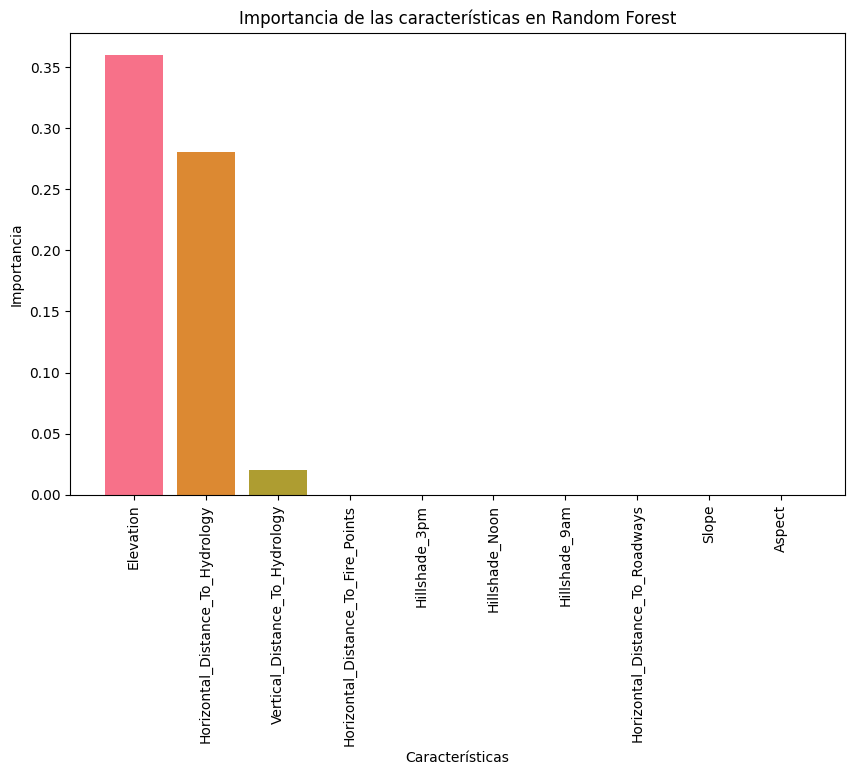

In [22]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
importances = adaboost.feature_importances_[:10]
feature_names = X_train.columns[:10]
indices = np.argsort(importances)[::-1][:10]
earth_tones = sns.color_palette("husl", 10)
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(importances)), importances[indices], color=earth_tones)
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en Random Forest')
plt.show()

 Primer árbol de decisión para el clasificador (son 50 árbles de decisión)

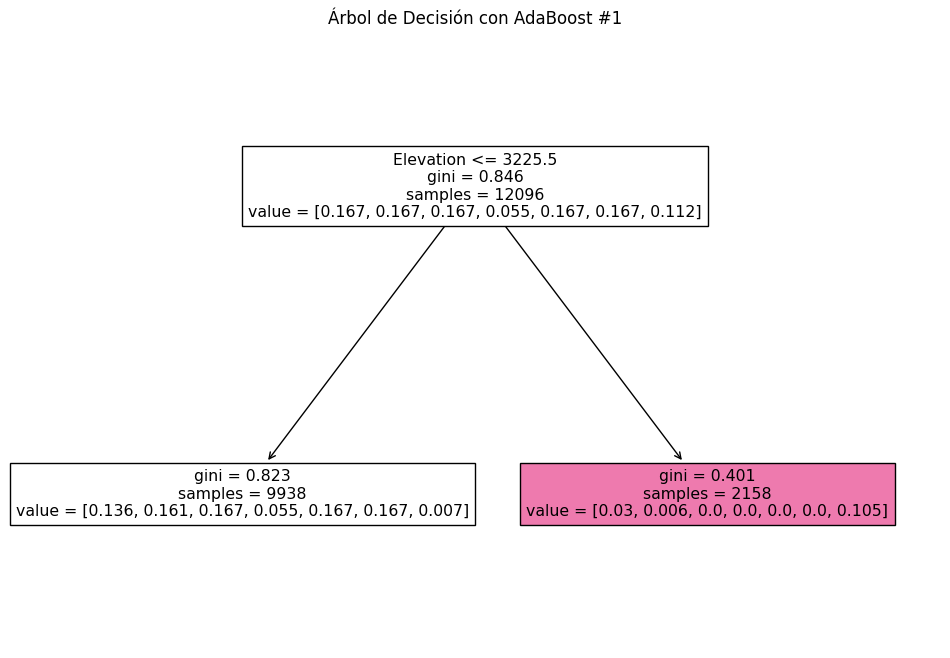

In [23]:
from sklearn.tree import plot_tree
tree = adaboost.estimators_[1]
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.title('Árbol de Decisión con AdaBoost #1')
plt.show()

Para ver los 50 árboles de decisión se ejecuta la siguiente celda.

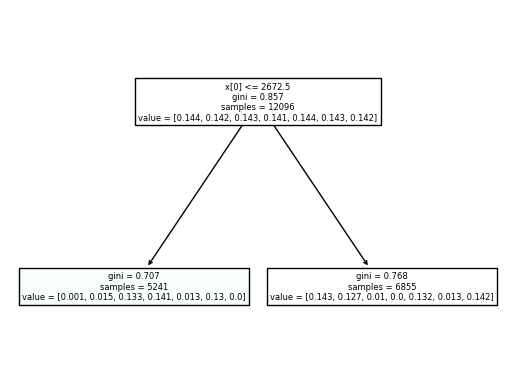

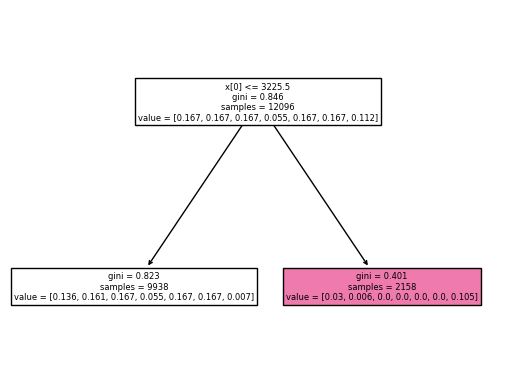

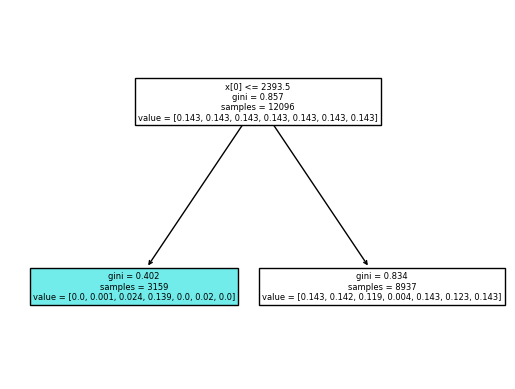

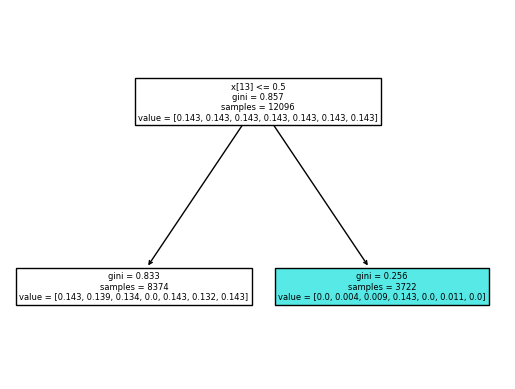

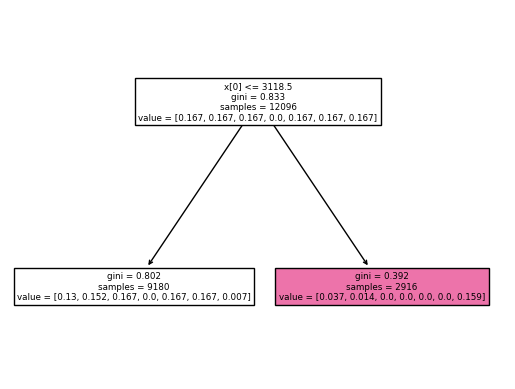

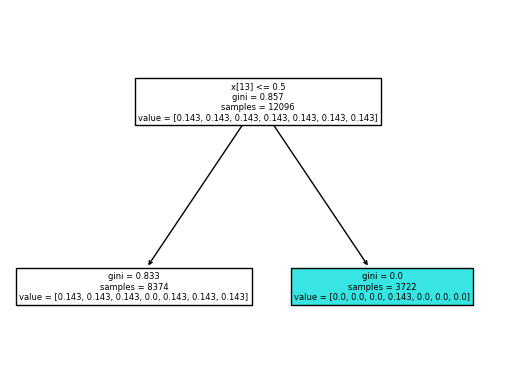

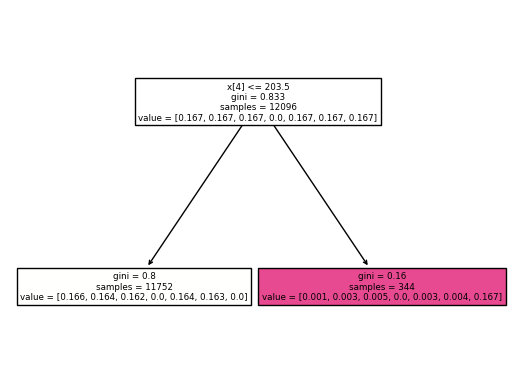

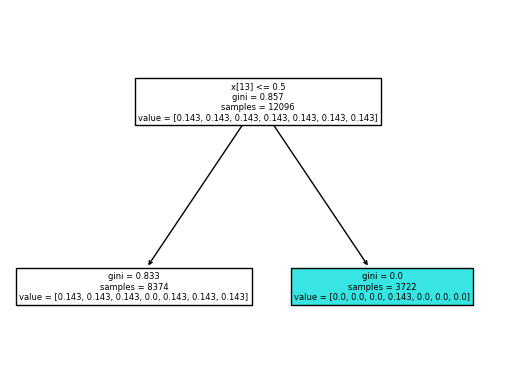

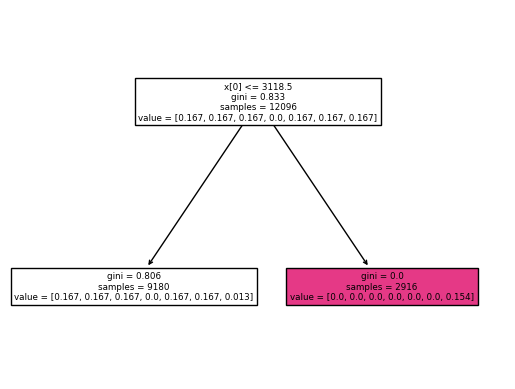

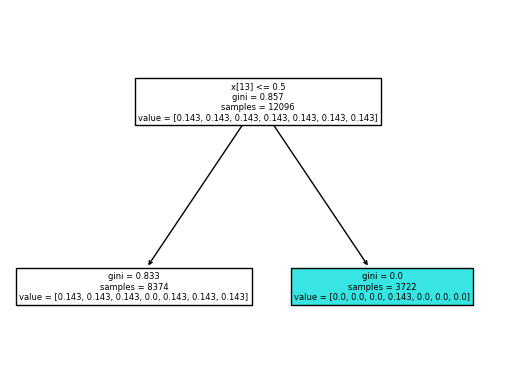

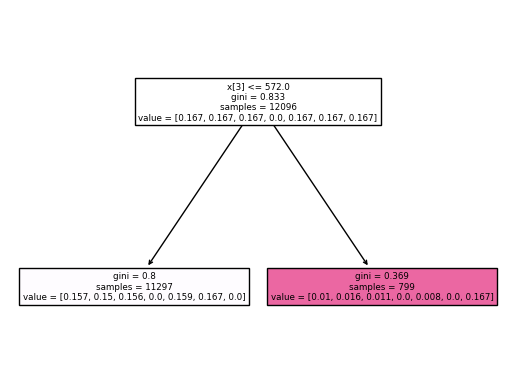

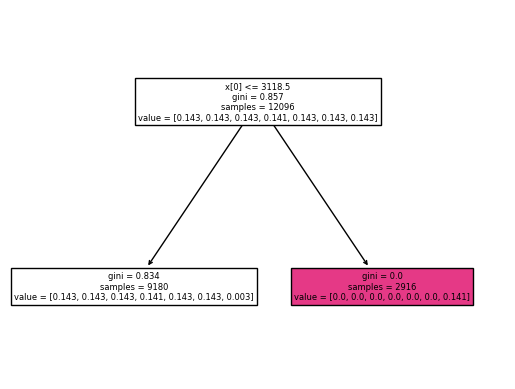

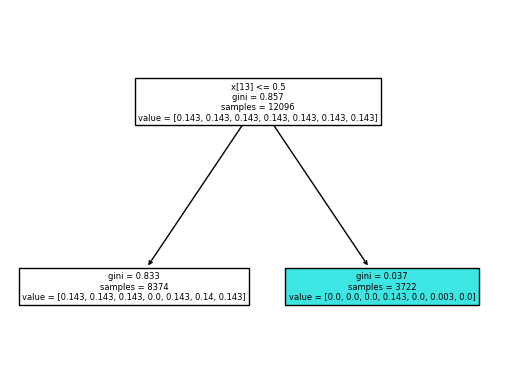

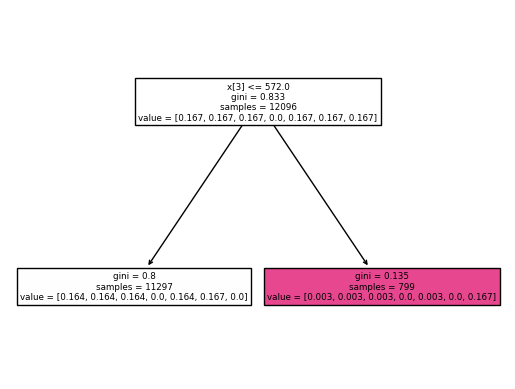

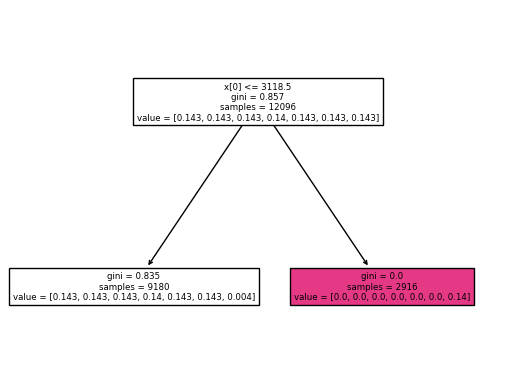

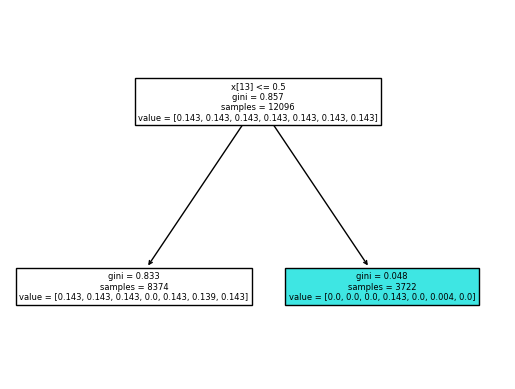

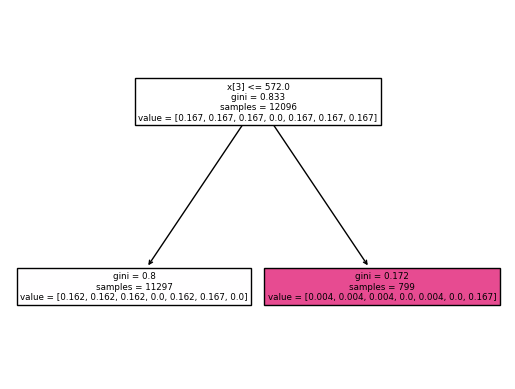

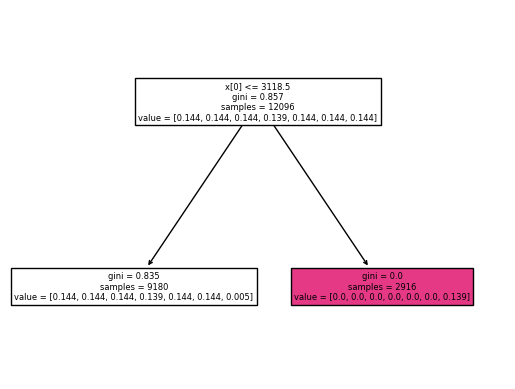

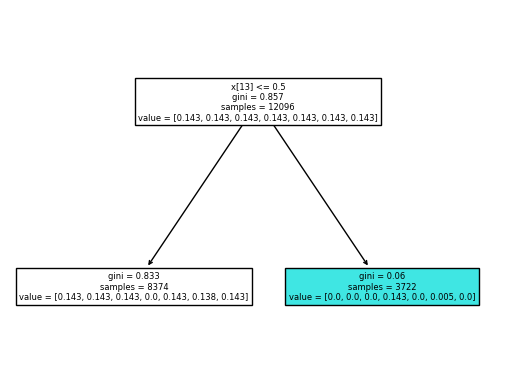

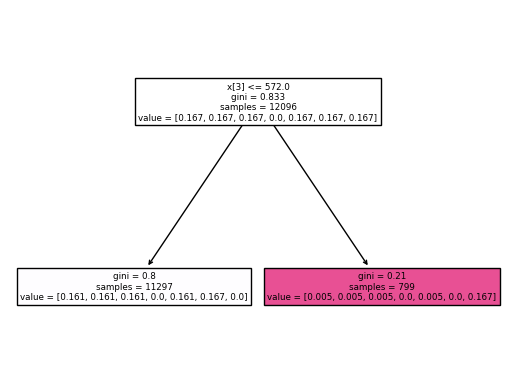

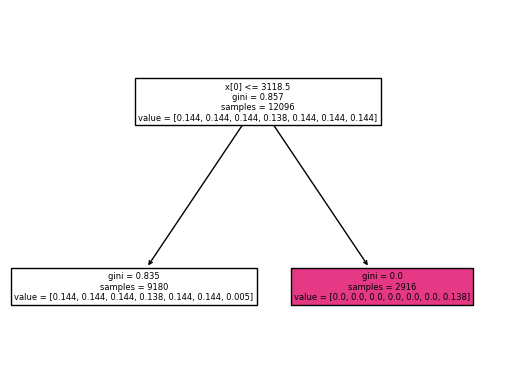

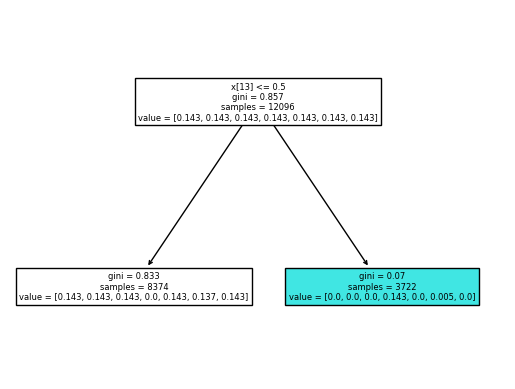

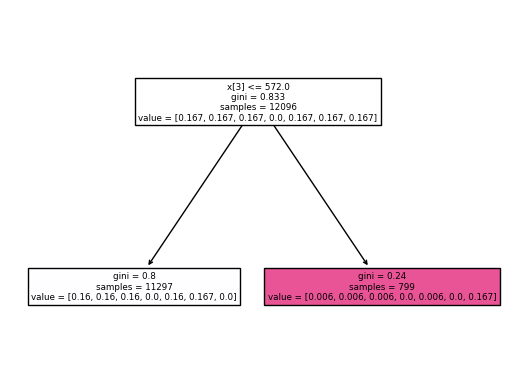

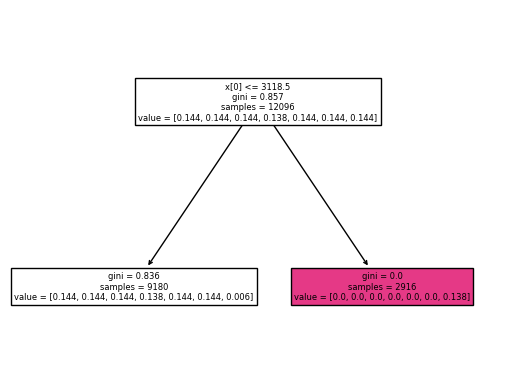

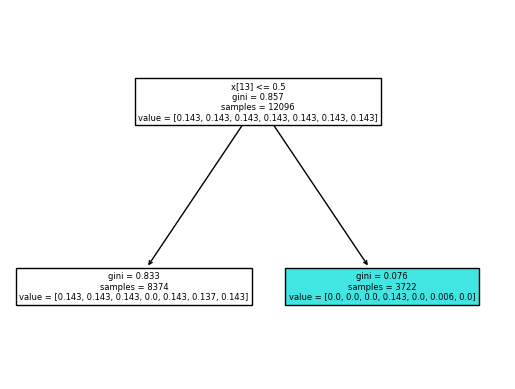

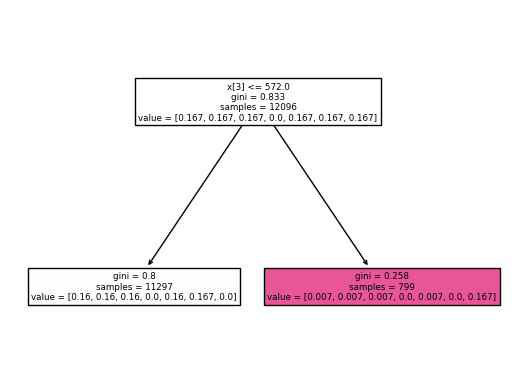

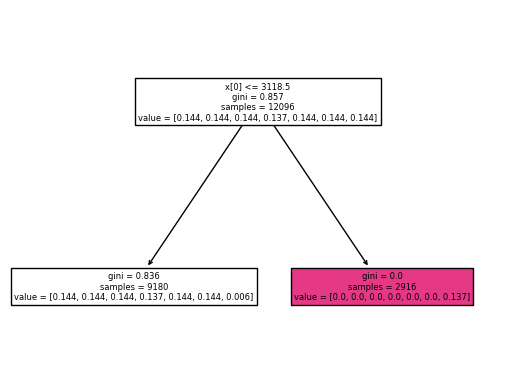

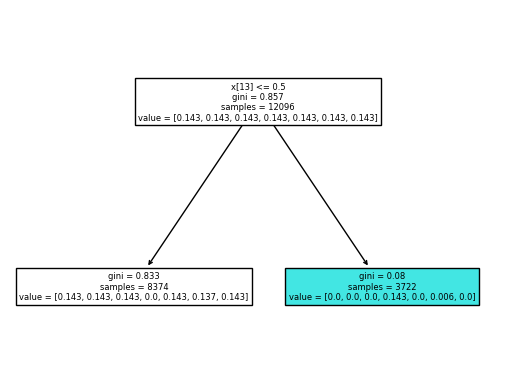

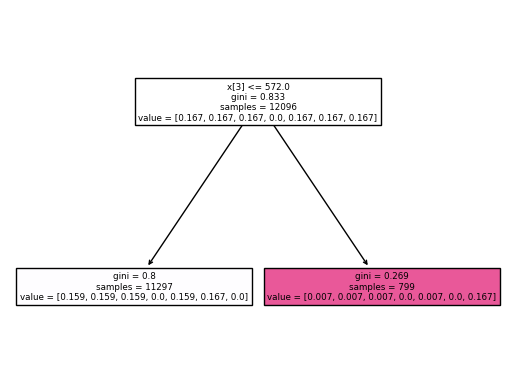

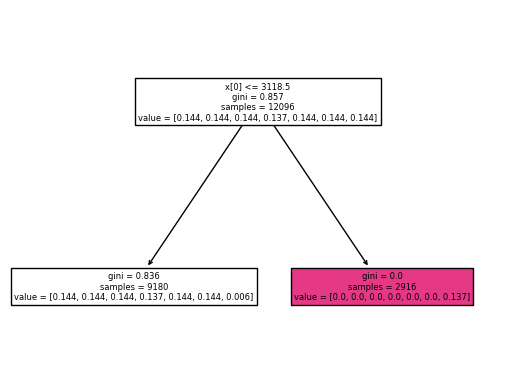

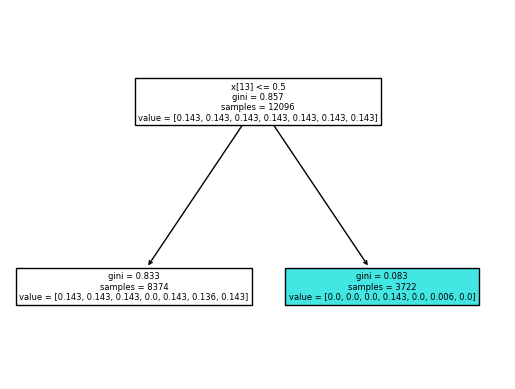

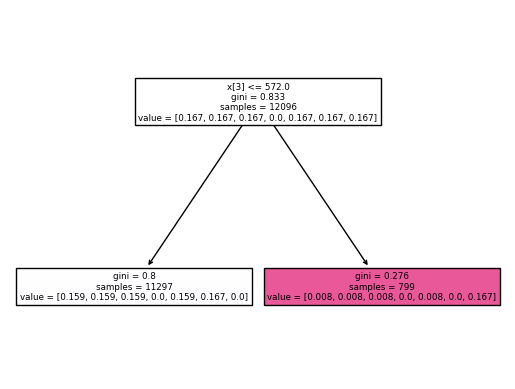

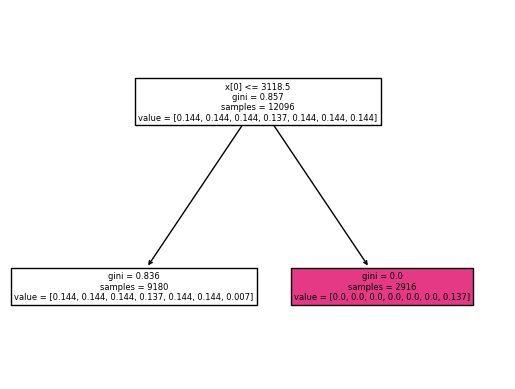

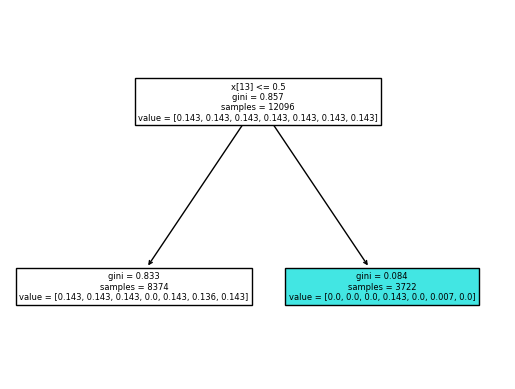

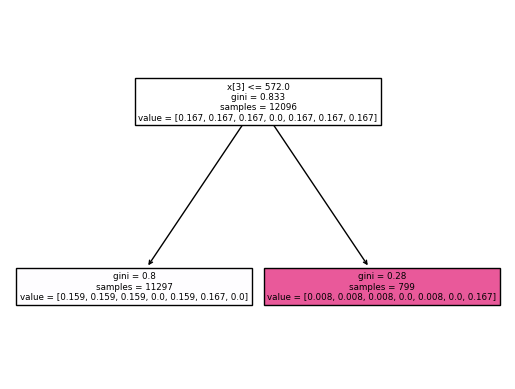

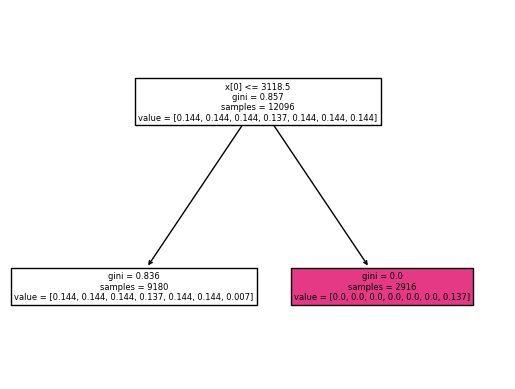

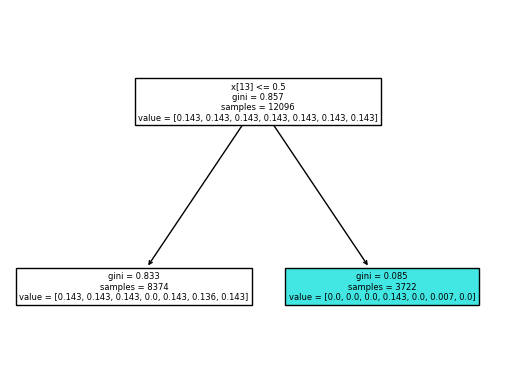

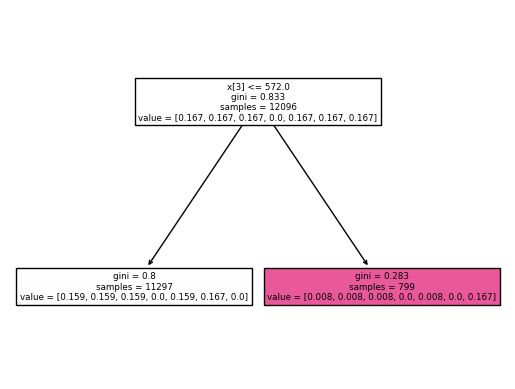

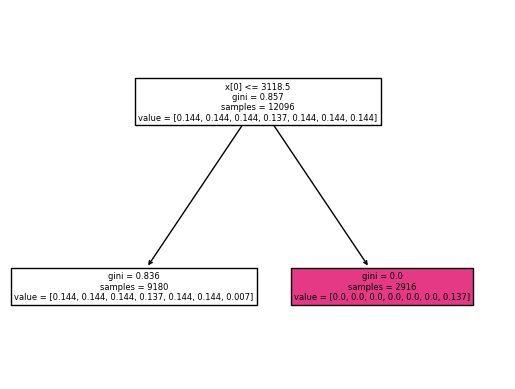

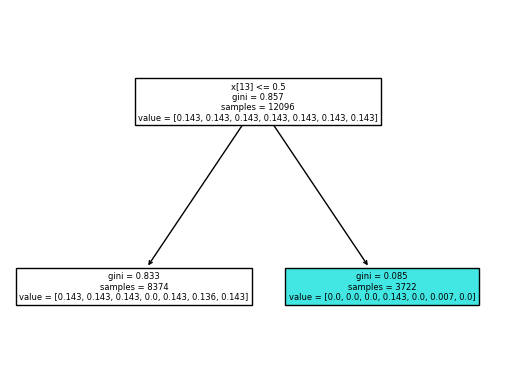

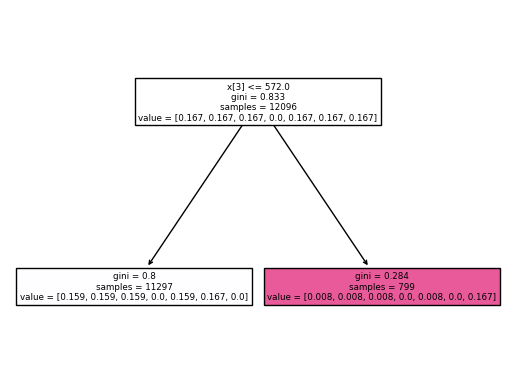

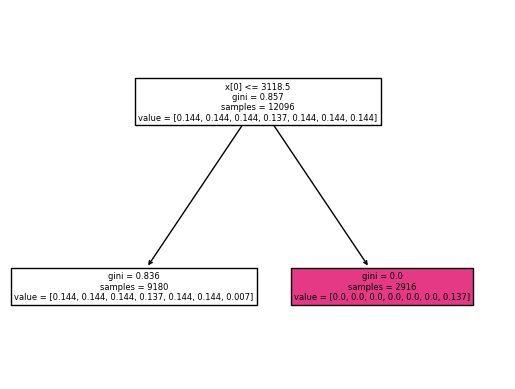

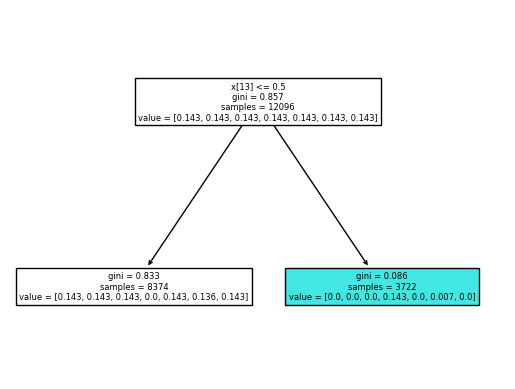

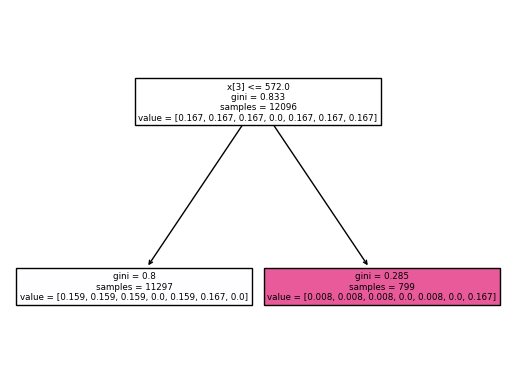

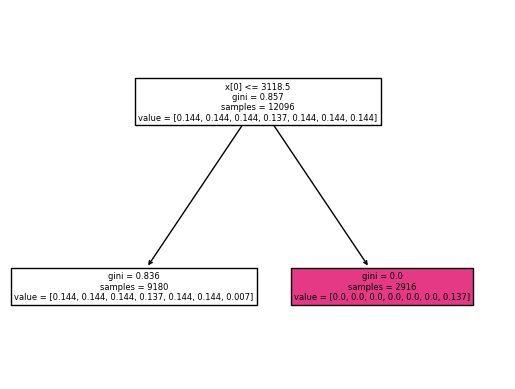

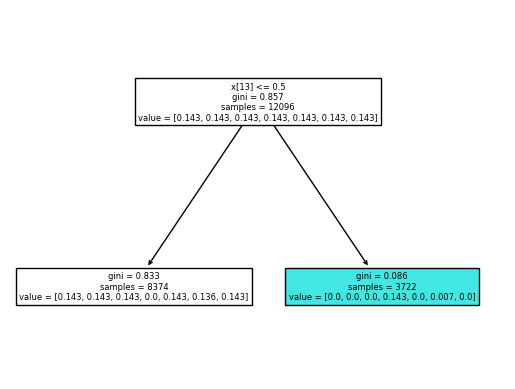

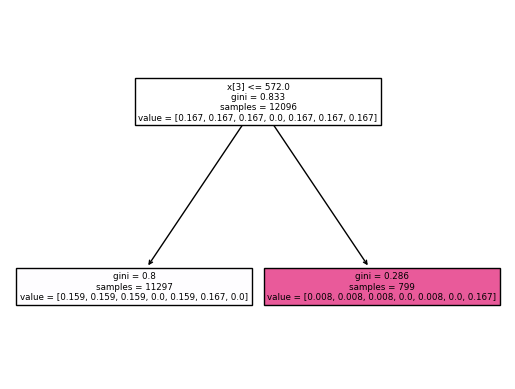

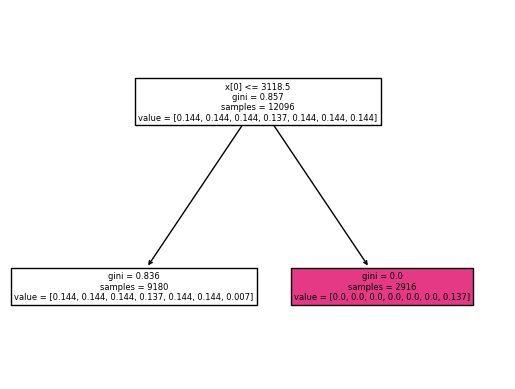

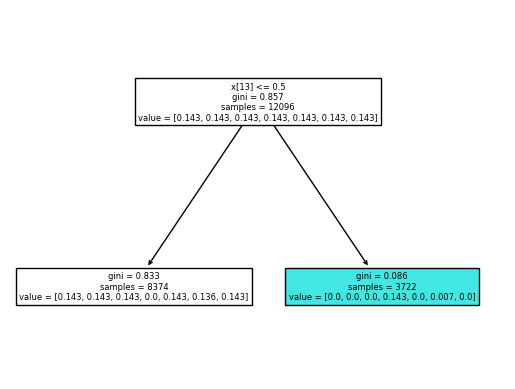

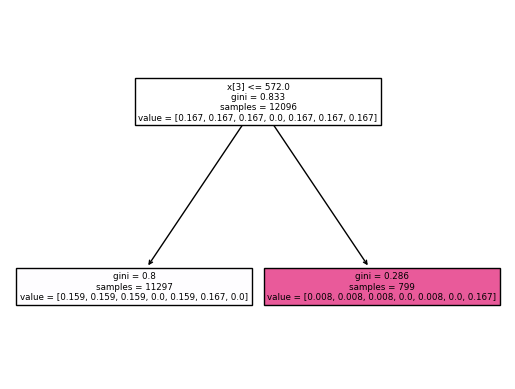

In [24]:
for i, estimator in enumerate(adaboost.estimators_):
    plt.figure()
    plt.title(f'Árbol de decisión {i+1}')
    plot_tree(estimator, filled=True)
    plt.show()

In [25]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

En primer lugar, se redujo el tamaño de los datos para agilizar el proceso de búsqueda de los mejores hiperparámetros. A continuación, se definieron los dos algoritmos predictivos que se iban a utilizar: LogisticRegression y Adaboost. Por último, se realizó la búsqueda de los mejores hiperparámetros de cada algoritmo utilizando una técnica de búsqueda exhaustiva. Los resultados de la búsqueda se imprimieron para poder evaluarlos posteriormente.

In [26]:
from sklearn.model_selection import GridSearchCV
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.05]
    })
}
for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Mejores hiperparámetros para {name}:")
    print(grid_search.best_params_)

Mejores hiperparámetros para Random Forest:
{'max_depth': 5, 'n_estimators': 50}
Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.1, 'n_estimators': 100}


Para evaluar el desempeño de los algoritmos predictivos, se dividió el conjunto de datos en dos conjuntos, uno de entrenamiento y otro de prueba. A continuación, se definieron los algoritmos predictivos con los mejores hiperparámetros encontrados en la celda anterior. Finalmente, se realizaron las curvas de aprendizaje de los dos algoritmos y se graficaron.

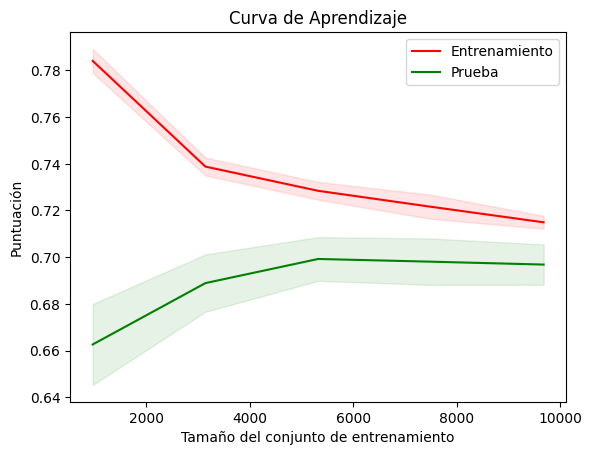

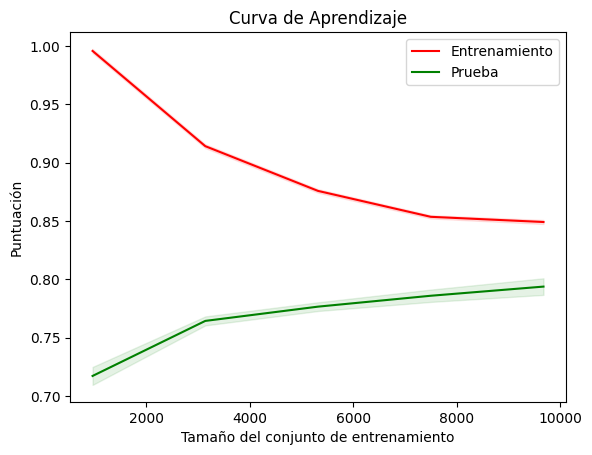

In [28]:

from sklearn.model_selection import learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
]
for classifier in classifiers:
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure()
    plt.plot(train_sizes, train_mean, label='Entrenamiento', color='red')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='red')
    plt.plot(train_sizes, test_mean, label='Prueba', color='green')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.legend(loc='best')
    plt.show()

 Hiperparámetros para dos combinaciones de: algoritmo no supervisado + algoritmo predictivo

In [29]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Para evaluar el desempeño del modelo de PCA y Logistic Regression, se definió el modelo como un pipeline. A continuación, se calcularon las curvas de aprendizaje del modelo. Finalmente, se calcularon las medias y desviaciones estándar de los puntajes de la curva de aprendizaje y se graficó la curva.

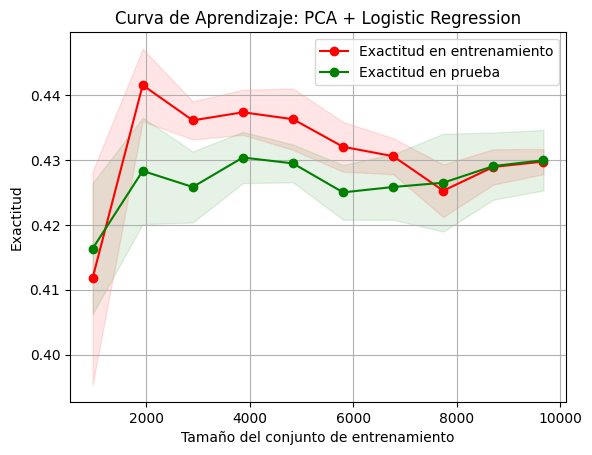

No se detecta overfitting en el modelo.


In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(max_iter=1000))
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title('Curva de Aprendizaje: PCA + Logistic Regression')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Exactitud en entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Exactitud en prueba')
plt.legend(loc='best')
plt.show()
diff_scores = train_scores_mean - test_scores_mean
if np.any(diff_scores > 0.1):
    print("Se detecta overfitting en el modelo.")
else:
    print("No se detecta overfitting en el modelo.")

Usaremos PCA con SVC.

In [31]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Para mejorar el desempeño del modelo, se buscaron los mejores hiperparámetros para PCA. A continuación, se aplicó PCA para reducir la dimensionalidad de los datos. Posteriormente, se utilizó SVM para realizar la clasificación. Finalmente, se evaluó el modelo en el conjunto de prueba.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA()
param_grid_pca = {'n_components': [2, 3]}
grid_search_pca = GridSearchCV(pca, param_grid_pca)
grid_search_pca.fit(X_train)
best_n_components = grid_search_pca.best_params_['n_components']
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
grid_search_svm = GridSearchCV(svm, param_grid_svm)
grid_search_svm.fit(X_train_pca, y_train)
best_C = grid_search_svm.best_params_['C']
best_gamma = grid_search_svm.best_params_['gamma']
svm_best = SVC(C=best_C, gamma=best_gamma)
svm_best.fit(X_train_pca, y_train)
accuracy = svm_best.score(X_test_pca, y_test)
print("Mejor valor de 'n_components':", best_n_components)
print("Mejor valor de 'C':", best_C)
print("Mejor valor de 'gamma':", best_gamma)
print("Exactitud en el conjunto de prueba:", accuracy)


Mejor valor de 'n_components': 3
Mejor valor de 'C': 10
Mejor valor de 'gamma': 0.001
Exactitud en el conjunto de prueba: 0.6058201058201058


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo SVM: {:.2f}".format(accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Exactitud del modelo SVM: 1.00
